In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
company=pd.read_csv("Company_Data.csv")
company


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [2]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.shape

(400, 11)

In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
company.Sales.mean()

7.496325

In [8]:
company.Sales=pd.cut(company.Sales, bins=2, labels=np.arange(2), right=False)
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [9]:

Labelencoder=LabelEncoder()
company.ShelveLoc=Labelencoder.fit_transform(company.ShelveLoc)
company.Urban=Labelencoder.fit_transform(company.Urban)
company.US=Labelencoder.fit_transform(company.US)
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


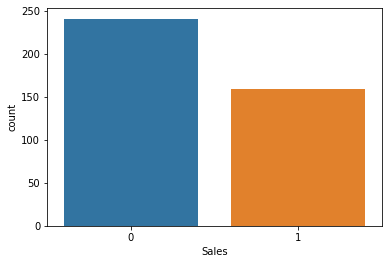

In [10]:
sns.countplot(company.Sales)

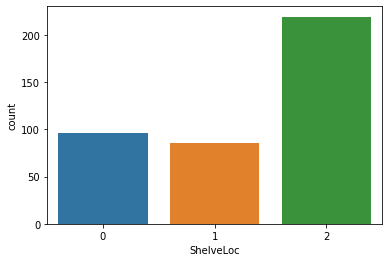

In [11]:
sns.countplot(company.ShelveLoc)

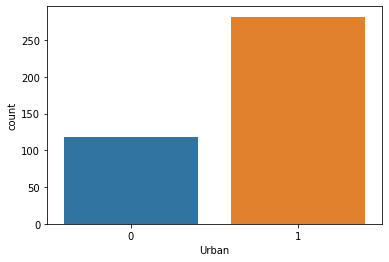

In [12]:
sns.countplot(company.Urban)

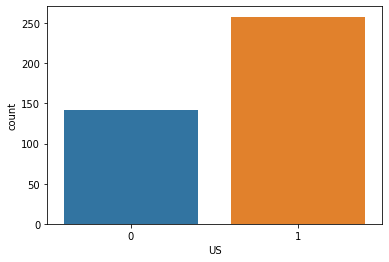

In [13]:
sns.countplot(company.US)

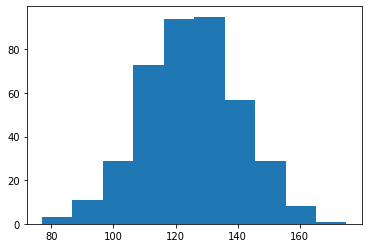

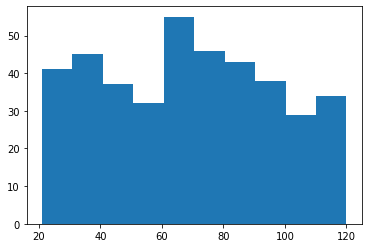

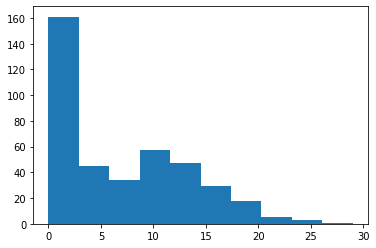

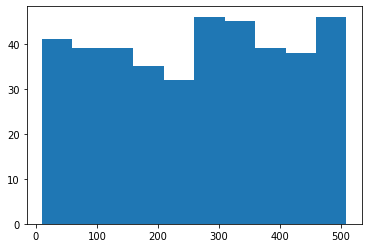

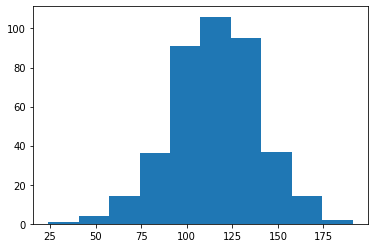

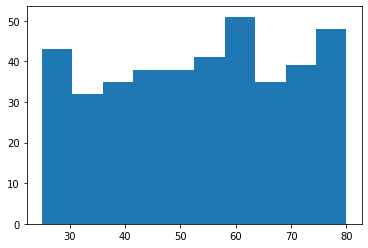

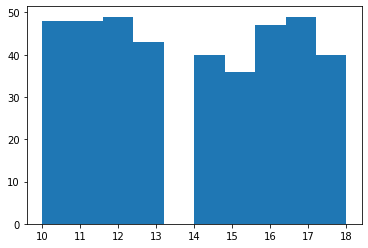

In [14]:
company=company.iloc[:,[0,1,2,3,4,5,7,8,6,9,10]]


for i in range(1,8):
    plt.hist(company.iloc[:,i])
    plt.show()
 

In [15]:
x=company.iloc[:,1:]
y=company["Sales"]    
from sklearn.model_selection import train_test_split     
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.15,random_state=42)


In [16]:
model=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model.fit(trainx,trainy)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [17]:

model.n_classes_


2

In [18]:
model.classes_


array([0, 1])

In [19]:
model.criterion


'entropy'

In [20]:
model.feature_importances_


array([0.11460415, 0.1207702 , 0.11532963, 0.09354843, 0.21123728,
       0.13377836, 0.0559085 , 0.12287761, 0.01748831, 0.01445754])

In [21]:
model.estimators_


[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=2090373093, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=19132685, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
          

In [22]:
model.n_estimators


100

In [23]:
model.n_features_


10

In [24]:
model.oob_score_


0.7823529411764706

In [25]:
model.n_outputs_


1

In [26]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)>

In [31]:
predict=model.predict(testx)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy,predict)


array([[31,  3],
       [ 9, 17]])

In [33]:
predict1=model.predict(testx)
accuracy1=np.mean(predict1==testy)
pd.crosstab(predict1,testy)

Sales,0,1
row_0,,
0,31,9
1,3,17


In [35]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=model,n_estimators=125,learning_rate=1)


In [36]:
boostmodel=ad.fit(trainx,trainy)

In [37]:
predad=ad.predict(testx)

In [38]:
from sklearn.metrics import accuracy_score
score=accuracy_score(predad,testy)
score


0.8

In [39]:
import xgboost as xgb

In [40]:
xgb1 = xgb.XGBClassifier(n_estimators=2000,learning_rate=1)

In [41]:
xgboost=xgb1.fit(trainx,trainy)

In [42]:
predxg=xgboost.predict(testx)

In [43]:
score1=accuracy_score(predxg,testy)
score1

0.75

In [44]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier(base_estimator=model,n_estimators=100,)
BC.fit(trainx,trainy)
pred2=BC.predict(testx)
score1=accuracy_score(pred2,testy)
score1

0.8